# Forecasting Football Scores in Python/Jupyter

## Introduction

The goal (pun intented) of this notebook is to model football scores using a Poisson distribution
and determine the expected scores of football matches and visualise them with heatmaps.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

## Assumptions

1. Probability of a scoring a goal in a time period is independent of time

2. Goals are randomly distributed

3. Goals are independent of one another


This notebook will be relying on a metric, Xg, which has been developed to capture the
scoring intensity of the team, thus satisfying the first assumption. We can grab the Xg for each match from https://projects.fivethirtyeight.com/soccer-predictions/europa-league/.  

For the next assumption, I've found enough studies to suggest that goals occur randomly for the most part, especially 
at the professional level where the skill gap is negligible. 
Here's a few studies that support this notion:

Hughes, M., & Franks, I. (2005). Analysis of passing sequences, shots and goals in soccer. Journal of sports sciences, 23(5), 509-514.

Goddard, J. (2005). Regression models for forecasting goals and match results in association football. International Journal of forecasting, 21(2), 331-340.

Greenhough, J., Birch, P. C., Chapman, S. C., & Rowlands, G. (2002). Football goal distributions and extremal statistics. Physica A: Statistical Mechanics and its Applications, 316(1-4), 615-624.

Almost ready to go, do goals occur independently?
This question is actually a bit more complex there have been many games where one team just pulls away or stages a comeback such that the final assumption cannot be satisfied and must end the project here.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.|
(But we will continue anyway)

In [2]:
def ScoreGrid(homeXg, awayXg):
    A = np.zeros(11)
    B = np.zeros(11)

    for i in range(10):
        A[i] = scipy.stats.poisson.pmf(i,homeXg)
        B[i] = scipy.stats.poisson.pmf(i,awayXg)
    
    A[10] = 1 - sum(A[:10])
    B[10] = 1 - sum(B[:10])

    #name = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10+"]
    #zero = np.zeros(11)

    C = pd.DataFrame(np.zeros((11,11)))
    
    for j in range(11):
        for k in range(11):
            C[j][k] = A[j]*B[k]
    
    #C_new = C.rename(columns = name, index = name)

    return round(C*100,2)/100

The above code creates a function to generate a proability matrix as demonstrated by the following line of code.

In [3]:
ScoreGrid(1.7,1.1)

,0,1,2,3,4,5,6,7,8,9,10
0,0.0608,0.1034,0.0879,0.0498,0.0212,0.0072,0.0020,0.0005,0.0001,0.0,0.0
1,0.0669,0.1137,0.0967,0.0548,0.0233,0.0079,0.0022,0.0005,0.0001,0.0,0.0
2,0.0368,0.0625,0.0532,0.0301,0.0128,0.0044,0.0012,0.0003,0.0001,0.0,0.0
3,0.0135,0.0229,0.0195,0.0110,0.0047,0.0016,0.0005,0.0001,0.0000,0.0,0.0
4,0.0037,0.0063,0.0054,0.0030,0.0013,0.0004,0.0001,0.0000,0.0000,0.0,0.0
5,0.0008,0.0014,0.0012,0.0007,0.0003,0.0001,0.0000,0.0000,0.0000,0.0,0.0
6,0.0001,0.0003,0.0002,0.0001,0.0001,0.0000,0.0000,0.0000,0.0000,0.0,0.0
7,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0
8,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0
9,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0


In [4]:
def ScoreHeatMap(home, away, homeXg, awayXg, datasource):
    adjustedHome = home.replace("_", " ")
    adjustedAway = away.replace("_", " ")

    df = ScoreGrid(homeXg, awayXg)

    ax = sns.heatmap(df, cbar = True, cmap = "OrRd")

    ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)
    #ax.xaxis.tick_top()
    plt.xlabel(adjustedHome)
    plt.ylabel(adjustedAway)
    plt.title('Expected Scores')
    
    return ax

The above function visualises the probabilty matrix as a heatmap. Lest take a match between Barcelona and Bayer Munich.

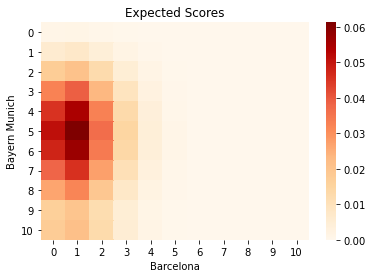

In [5]:
ScoreHeatMap("Barcelona", "Bayern_Munich", 1.2, 5.6, "FiveThirtyEight")

Here we observe that the score is most likely to be around 1-5 How about Paris SG vs Bayern Munich?

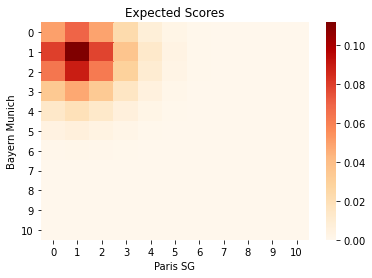

In [6]:
ScoreHeatMap("Paris_SG", "Bayern_Munich", 1.4,1.6,"FiveThirtyEight")

Since the score is most likley to 1-1, we can expect this match to be quite a bit closer.

## Validation

Earliest UEFA Champions League bracket (that I could find, Jul-10-2020):
<center><img src="https://pbs.twimg.com/media/EcjxLbsWsAAbBYR?format=jpg&name=small"></center>

### Round of 16

Since we already know the result of half the matches in the bracket, lets see how our model compares. 

#### Leipzig vs Tottenham
We expect Leipzig to win 1-0. 

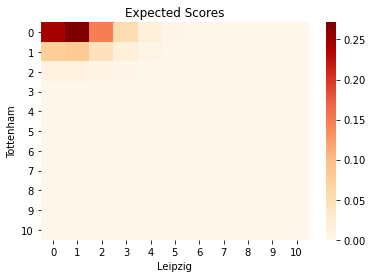

In [7]:
ScoreHeatMap("Leipzig", "Tottenham", 1.1, 0.3,"FiveThirtyEight")

#### Liverpool vs Atletico Madrid

Liverpool should win with a score of 3-1

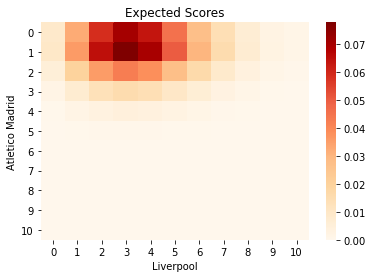

In [8]:
ScoreHeatMap('Liverpool', "Atletico Madrid", 3.6, 1.1,"FiveThirtyEight")

#### Atalanta vs Valencia
Atalanta is expected to win with a score of 3-2

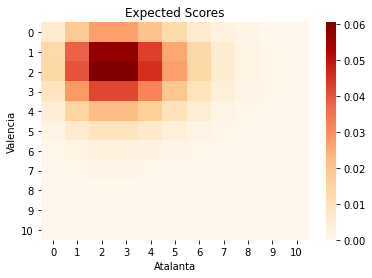

In [9]:
ScoreHeatMap('Atalanta', "Valencia", 3.0, 2.1,"FiveThirtyEight")

#### PSG vs Dortmund
Paris SG should win 1-0

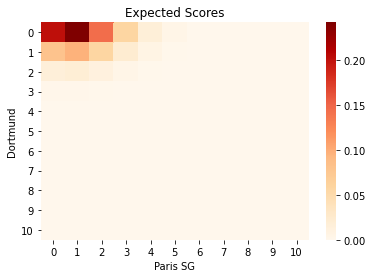

In [10]:
ScoreHeatMap('Paris_SG', "Dortmund", 1.2, 0.4,"FiveThirtyEight")

#### Manchester City vs Real Madrid
2-0

#### Juventus vs Olympique Lyon
2-1

#### Barcelona vs Napoli
1-2

#### Bayern Munich vs Chelsea
3-1

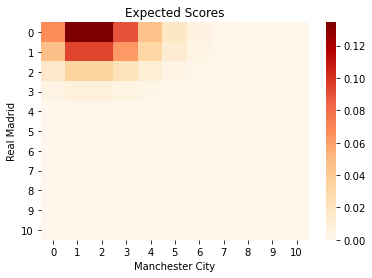

In [11]:
ScoreHeatMap('Manchester City', "Real Madrid", 2.0, 0.7,"FiveThirtyEight")

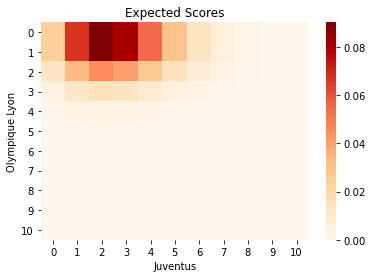

In [12]:
ScoreHeatMap('Juventus', "Olympique Lyon", 2.7, 1.0,"FiveThirtyEight")

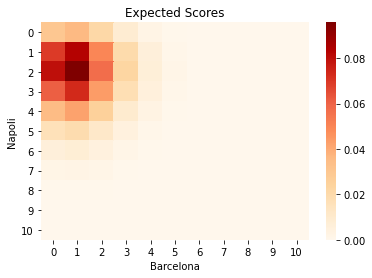

In [13]:
ScoreHeatMap('Barcelona', "Napoli", 1.2, 2.3,"FiveThirtyEight")

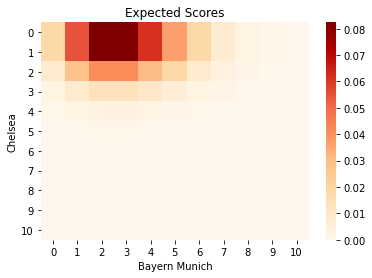

In [14]:
ScoreHeatMap('Bayern Munich', "Chelsea", 3.0, 1.0,"FiveThirtyEight")

#### Recap
So far 6 out of 8 matches have been predicted correctly, not bad. However all actual scores are within the margin of error, even the upset between Liverpool and Atletico Madrid. Let's continue with forecasts for the remaining matches.  

### Quater-finals

A: Man. City vs Olmpique Lyon
3-0

B: Leipzig vs Atletico Madrid
0-0

C: Barcelona vs Bayern Munich
1-5

D: Atalanta vs Paris SG
0-2

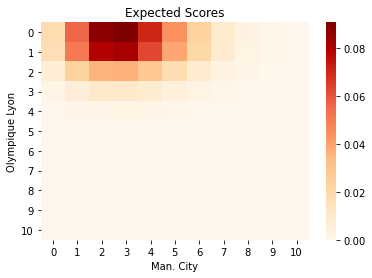

In [15]:
ScoreHeatMap('Man. City', "Olympique Lyon", 3.1, 0.9, "FiveThirtyEight")

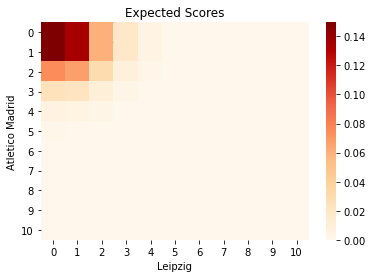

In [16]:
ScoreHeatMap('Leipzig', "Atletico Madrid", 0.9, 1.0,"FiveThirtyEight")

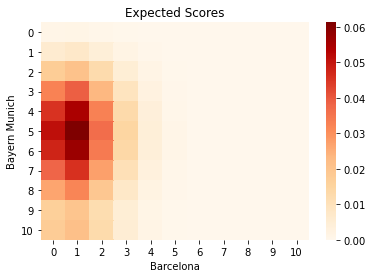

In [17]:
ScoreHeatMap('Barcelona', "Bayern Munich", 1.2, 5.6,"FiveThirtyEight")

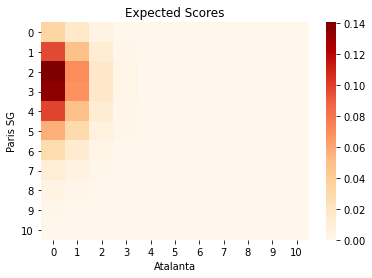

In [18]:
ScoreHeatMap('Atalanta', "Paris SG", 0.5, 2.9,"FiveThirtyEight")

Now we have correctly forecast 2 out of 4 matches, Olympique Lyon won in another upset. The Leipzig vs Atletico Madrid was a pretty close match anyway so we'll take a half point there. Not looking too good.

### Semi Finals

1. Olympique Lyon vs Bayern Munich
1-3

2. Leipzig vs Paris SG
1-3

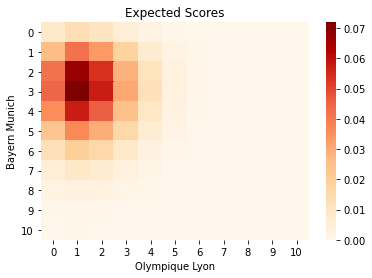

In [19]:
ScoreHeatMap('Olympique Lyon', "Bayern Munich", 1.6, 3.2,"FiveThirtyEight")

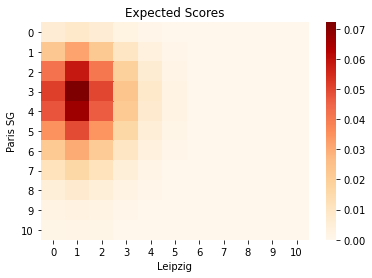

In [20]:
ScoreHeatMap('Leipzig', "Paris SG", 1.4, 3.7,"FiveThirtyEight")

### Finals

Looks like our model has finally come through with a prediction accuracy of 100% in the semi-finals. 
Here we are at the Finals and with the model predicting a tight game favouring Bayern Munich. 

Paris SG vs Bayern Munich 
1-1

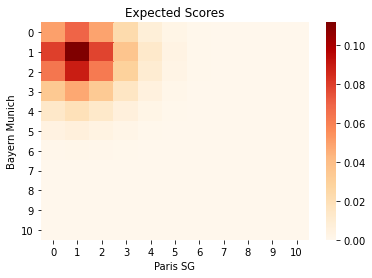

In [21]:
ScoreHeatMap('Paris SG', "Bayern Munich", 1.4, 1.6,"FiveThirtyEight")

Updated UEFA Champions League bracket as of Aug-23-2020:
<center><img src="https://sportshub.cbsistatic.com/i/r/2020/08/19/5cfc52ea-322b-48a9-857d-3635171724f0/resize/670x377/ecdd597325d1c932fc95e9e5d6a6c368/champions-league-bracket.png"></center>


## Conclusion

Lets break this down a bit before we celebrate and start generating prediction and placing bets for the next season.
Yes, we've accurately predicted the victors of the UEFA Champions League finals and semi-finals, definitely adds points in our favour (3-0).
However the score balances out a bit in the quater finals where it was only able to predict 2 matches, 2.5 if we include Leipzig vs Atletico Madrid (5.5-1.5) and is more noticeable in the Round of 16 where the model had prediction accuracy of 75%. 

Final Score: 11.5-5.5 (~68% model accuracy)